<a href="https://colab.research.google.com/github/filipesartori/Segmenta-oPython/blob/main/Segmenta%C3%A7%C3%A3o_por_regi%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/Colab\ Notebooks/Segmentação\ Python/imagens/ imagens/

In [4]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

Segmentação baseada em região

In [5]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
altura, largura = img.shape[0], img.shape[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_flat = gray.reshape(altura * largura)

In [6]:
media = img_flat.mean()
num_pixels = len(img_flat)

In [7]:
for i in range(num_pixels):
  if img_flat[i] > media:
    img_flat[i] = 255
  else:
    img_flat[i] = 0

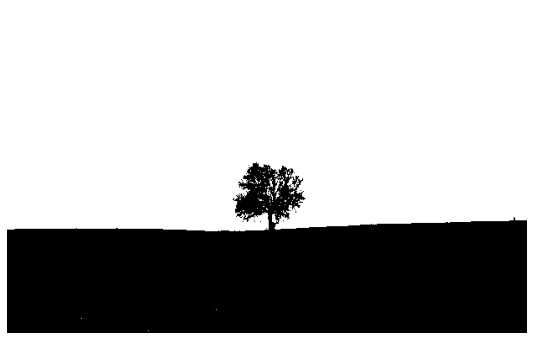

In [8]:
seg_regiao = img_flat.reshape(altura, largura)
mostrar(seg_regiao)

In [9]:
def flatten_img(img):
  altura, largura = img.shape[0], img.shape[1]
  img_flat = img.reshape(altura * largura)
  return img_flat

In [11]:
from skimage.color import rgb2gray

In [12]:
gray = rgb2gray(img)
img_flat = flatten_img(gray)

2 regiões

In [13]:
def segmenta2regioes(img):
  pixels = flatten_img(img).copy()
  media = pixels.mean()
  for i in range(len(pixels)):
    if pixels[i] > media:
      pixels[i] = 255
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

3 Regiões

In [15]:
def segmenta3regioes(img):
  pixels = flatten_img(img).copy()
  for i in range(len(pixels)):
    if pixels[i] > 0.66:
      pixels[i] = 2
    elif pixels[i] > 0.33:
      pixels[i] = 1  
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

4 Regiões

In [17]:
1/4

0.25

In [18]:
def segmenta4regioes(img):
  pixels = flatten_img(img).copy()
  for i in range(len(pixels)):
    if pixels[i] > 0.75:
      pixels[i] = 3
    elif pixels[i] > 0.5:
      pixels[i] = 2
    elif pixels[i] > 0.25:
      pixels[i] = 1  
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

5 Regiões

In [20]:
1/5

0.2

In [21]:
def segmenta5regioes(img):
  pixels = flatten_img(img).copy()
  for i in range(len(pixels)):
    if pixels[i] > 0.8:
      pixels[i] = 4
    elif pixels[i] > 0.6:
      pixels[i] = 3
    elif pixels[i] > 0.4:
      pixels[i] = 2
    elif pixels[i] > 0.2:
      pixels[i] = 1  
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

In [32]:
def segmentacao_regiao(link, cmap='gray'):
  img = cv2.imread(link)
  original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = rgb2gray(img)
  segment2R = segmenta2regioes(gray)
  segment3R = segmenta3regioes(gray)
  segment4R = segmenta4regioes(gray)
  segment5R = segmenta5regioes(gray)
  
  titulos = ['Imagem Original', '2 Regiões', '3 Regiões', '4 Regiões', '5 Regiões', 'Original (1 canal)']
  imagens = [original, segment2R, segment3R, segment4R, segment5R, gray]

  fig = plt.gcf()
  fig.set_size_inches(18, 10)  
  for i in range(6):
      plt.subplot(2,3,i+1)
      plt.imshow(imagens[i], cmap) 
      plt.title(titulos[i]) 
      plt.xticks([]),plt.yticks([])
      
  plt.subplots_adjust(wspace=0.05)
  plt.show()  

In [ ]:
segmentacao_regiao('/content/imagens/paisagem01.jpg')

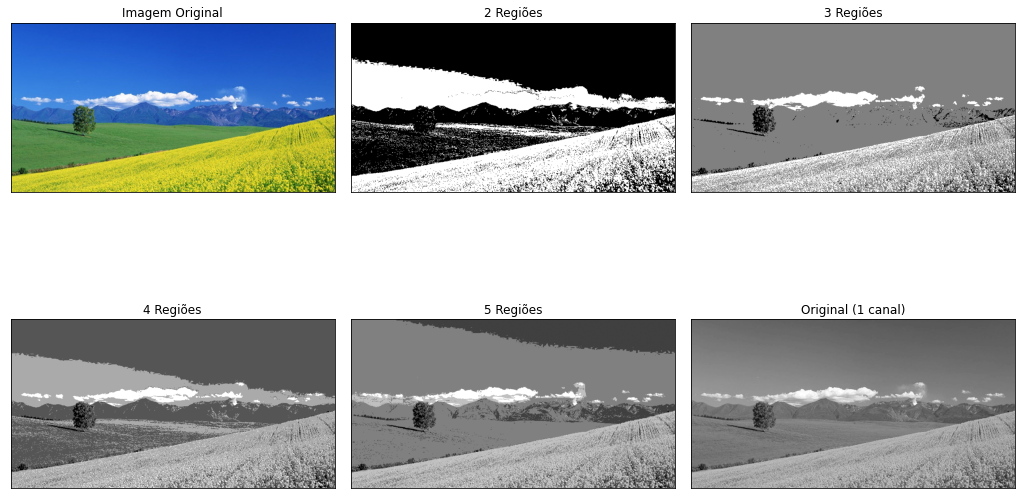

In [34]:
segmentacao_regiao('/content/imagens/paisagem02.jpg')

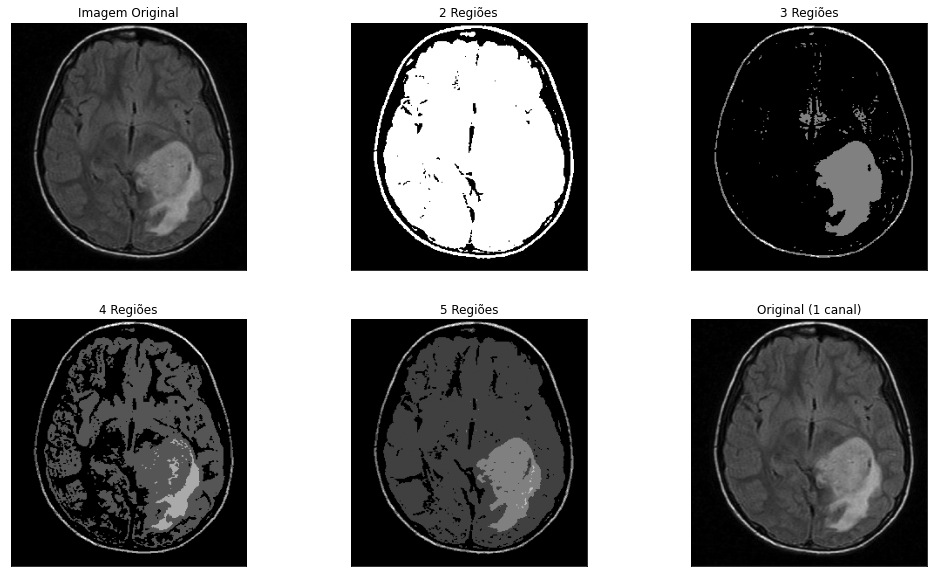

In [35]:
segmentacao_regiao('/content/imagens/ct-scan.jpg')

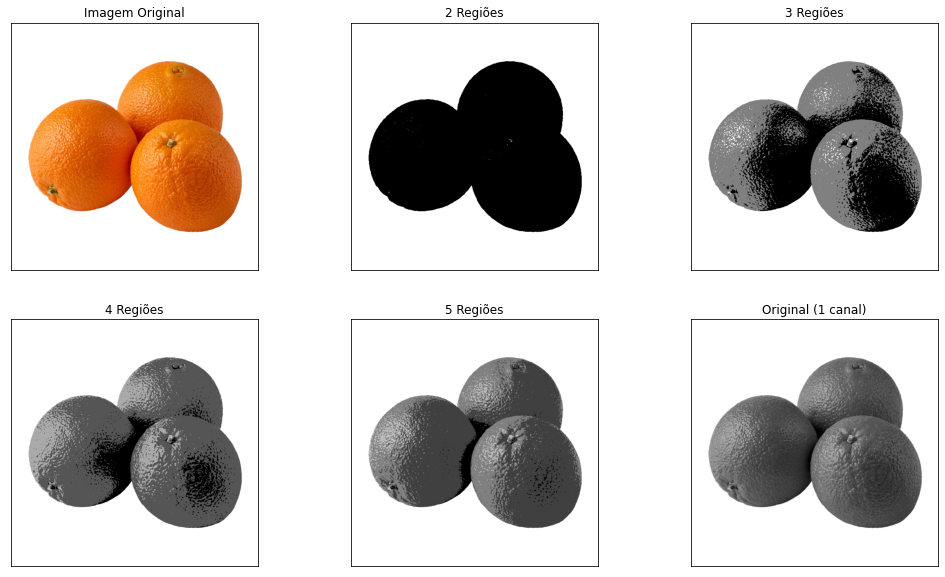

In [40]:
segmentacao_regiao('/content/imagens/laranjas.jpg')